<a href="https://colab.research.google.com/github/YasirKhan1811/Artificial_Intelligence/blob/main/clustering_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [39]:
# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clustering_penguins/penguins.csv")

In [40]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [7]:
penguins_df.shape

(344, 5)

In [46]:
# Step 2 - Dealing with null values and outliers
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [43]:
penguins_df.dropna(inplace=True)
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [47]:
penguins_df.shape

(335, 5)

In [48]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


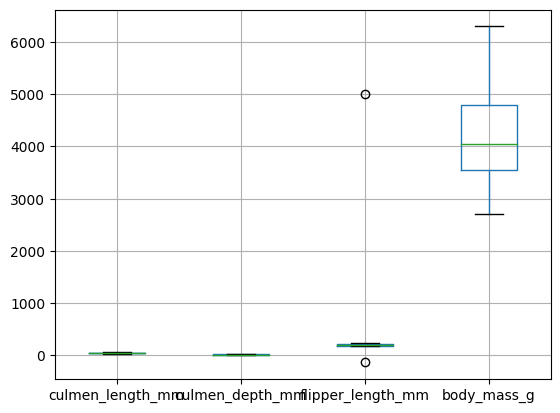

In [49]:
penguins_df.boxplot()
plt.show()

In [13]:
# to show the unique values of sex column
penguins_df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [50]:
# this code removes the row from the dataframe, where sex is written as '.'
penguins_df[penguins_df['sex'] != '.'].shape

(334, 5)

In [51]:
# this code will filter out the outliers from the "flipper_length_mm" column
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] > penguins_df['flipper_length_mm'].min()) & (penguins_df['flipper_length_mm'] < penguins_df['flipper_length_mm'].max())]
penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [52]:
# seeing the columns in our cleaned df
penguins_clean.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# column_trans = make_column_transformer((OneHotEncoder(), ['sex']),
#                                        remainder='passthrough')

In [ ]:
# penguins_ohe = column_trans.fit_transform(penguins_clean)

In [65]:
# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [ ]:
# column_trans = make_column_transformer((OneHotEncoder(), ['sex']),
#                                        (StandardScaler(), ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']), remainder='passthrough')

In [54]:
# cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# column_trans = make_column_transformer((StandardScaler(), cols), remainder='passthrough')

Standardization is typically applied to numerical features to ensure that they have zero mean and unit variance.

If you have a column representing 'sex' with values 0 and 1, it's not necessary to standardize this column because it's already in a scale (0 and 1) that is meaningful. StandardScaler is mainly applied to continuous numerical features.

In [66]:
# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [70]:
ohe = OneHotEncoder()
ohe.fit_transform(penguins_clean[['sex']])

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

In [55]:
penguins_array = column_trans.fit_transform(ohe).round(2)

In [56]:
penguins_preprocessed = pd.DataFrame(penguins_array, columns=list(ohe.columns))
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.91,0.79,-1.43,-0.57,0.0,1.0
1,-0.83,0.13,-1.07,-0.51,1.0,0.0
2,-0.68,0.44,-0.43,-1.19,1.0,0.0
3,-1.35,1.10,-0.57,-0.94,1.0,0.0
4,-0.87,1.76,-0.79,-0.69,0.0,1.0


In [57]:
# instantiate empty pca and fit to the dataset
pca = PCA()
pca.fit(penguins_preprocessed)

PCA()

In [58]:
features = range(pca.n_components_)

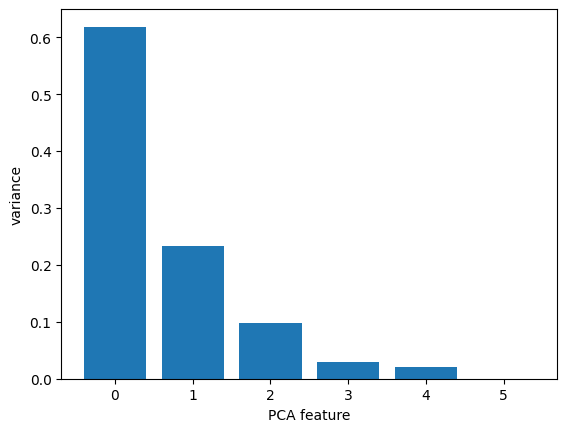

In [59]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [72]:
n_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.1])
n_components

2

In [73]:
pca.explained_variance_ratio_

array([0.61861752, 0.23268443])

In [61]:
pca = PCA(n_components = 2)

In [62]:
pca.fit(penguins_preprocessed.values)

PCA(n_components=2)

In [27]:
penguins_PCA = pca.transform(penguins_preprocessed)
penguins_PCA.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


(333, 2)

In [29]:
clusters = range(1, 15)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=42, n_init='auto')
    kmeans.fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

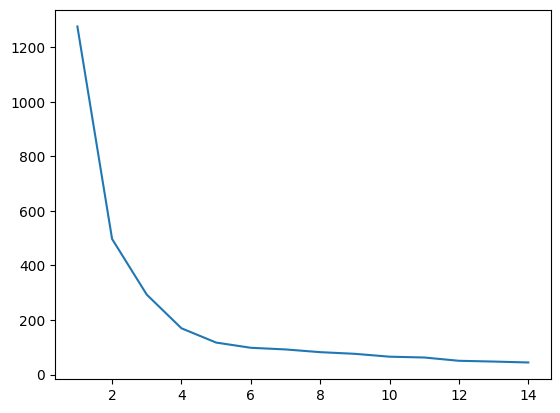

In [30]:
plt.plot(clusters, inertia)
plt.show()

In [32]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(penguins_PCA)

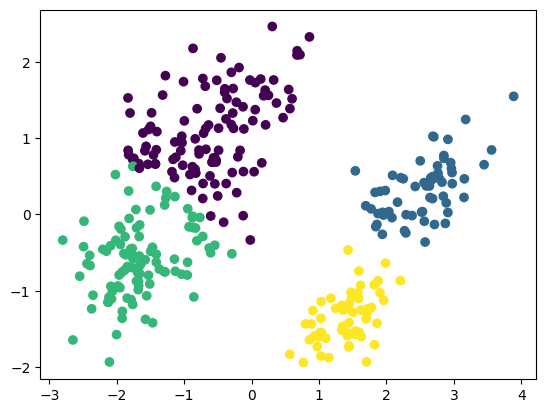

In [33]:
xs = penguins_PCA[:, 0]
ys = penguins_PCA[:, 1]

plt.scatter(xs, ys, c=labels)
plt.show()

In [34]:
penguins_clean['label'] = kmeans.labels_

<ipython-input-34-3dab43edda95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['label'] = kmeans.labels_


In [35]:
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,0


In [36]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                   'body_mass_g']

# stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
# stat_penguins

In [38]:
stat_dataframe = penguins_clean.groupby('label')[numeric_columns].mean()
stat_dataframe

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,44.809091,19.088182,195.527273,3995.909091
1,49.473770,15.718033,221.540984,5484.836066
2,39.081553,17.577670,188.009709,3407.766990
3,45.545763,14.262712,212.779661,4683.050847


In [ ]:
# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins